In [1]:
import numpy as np
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
import os
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data_dir = '/storage/yw18581/data/'
data_folder = os.path.join(data_dir, 'train_validation_test')

In [4]:
X_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["y"]
y_1mm = np.load(os.path.join(data_folder, "Xy_1mm.npz"))["dist"]

X_2mm = np.load(os.path.join(data_folder, "Xy_2mm.npz"))["y"]
y_2mm = np.load(os.path.join(data_folder, "Xy_2mm.npz"))["dist"]

X_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["y"]
y_3mm = np.load(os.path.join(data_folder, "Xy_3mm.npz"))["dist"]

X_4mm = np.load(os.path.join(data_folder, "Xy_4mm.npz"))["y"]
y_4mm = np.load(os.path.join(data_folder, "Xy_4mm.npz"))["dist"]



In [5]:
def cut_X(arr, reshape = None):
    x_cut = arr[:,960:1300,600:]
    if reshape:
        if len(x_cut.shape)>3:
            x_cut = x_cut[...,0]
            x_cut_out = x_cut.reshape(x_cut.shape[0],x_cut.shape[1]*x_cut.shape[2])
    else:
        x_cut_out = x_cut
    return x_cut_out

def reshape_RF(arr):
    arr_RF = arr.reshape((arr.shape[0], arr.shape[1]*arr.shape[2]))
    return arr_RF

In [6]:
X_1mm_cut = cut_X(X_1mm)
X_2mm_cut = cut_X(X_2mm)
X_3mm_cut = cut_X(X_3mm)
X_4mm_cut = cut_X(X_4mm)

X_1mm_RF  = reshape_RF(X_1mm_cut)
X_2mm_RF  = reshape_RF(X_2mm_cut)
X_3mm_RF  = reshape_RF(X_3mm_cut)
X_4mm_RF  = reshape_RF(X_4mm_cut)


In [7]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, verbose=10 )

In [9]:
X = np.vstack((X_1mm_RF, X_2mm_RF, X_4mm_RF))

In [10]:
y = np.hstack((y_1mm, y_2mm, y_4mm))

In [12]:
rf.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


building tree 3 of 100


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.7s remaining:    0.0s


building tree 4 of 100


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.8s remaining:    0.0s


building tree 5 of 100


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.0s remaining:    0.0s


building tree 6 of 100


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.9s remaining:    0.0s


building tree 7 of 100


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   27.7s remaining:    0.0s


building tree 8 of 100


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   31.3s remaining:    0.0s


building tree 9 of 100


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   35.1s remaining:    0.0s


building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.5min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=10, warm_start=False)

In [14]:
preds = rf.predict(X_3mm_RF)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
mean_squared_error(y_3mm, preds)

0.45016466666666666

In [17]:
preds

array([2.5 , 3.38, 3.72, 3.56, 2.66, 3.22, 3.92, 3.68, 3.88, 3.16, 2.88,
       4.  , 3.88, 3.92, 2.84, 3.26, 3.9 , 3.64, 3.9 , 2.7 , 3.48, 3.96,
       3.8 , 3.54, 2.46, 2.96, 2.88, 3.36, 3.9 , 3.22, 3.73, 3.76, 3.36,
       3.96, 2.72, 3.54, 3.3 , 3.7 , 4.  , 2.46, 2.72, 4.  , 3.  , 2.26,
       2.88, 3.58, 3.98, 3.96, 3.72, 2.86, 2.74, 3.9 , 3.98, 2.64, 2.52,
       3.9 , 3.28, 3.24, 3.24, 2.36, 3.5 , 3.08, 3.47, 2.68, 3.22, 3.76,
       3.83, 2.44, 3.62, 2.24, 3.5 , 3.98, 3.7 , 2.68, 3.2 , 3.79, 3.96,
       3.98, 3.76, 2.8 , 3.36, 3.96, 3.82, 2.62, 3.74, 3.98, 3.7 , 3.73,
       3.5 , 2.4 , 3.62, 2.8 , 3.98, 2.48, 3.26, 3.8 , 3.88, 3.8 , 3.66,
       2.28, 3.5 , 3.4 , 3.52, 2.7 , 3.3 , 3.9 , 3.88, 3.96, 2.54, 3.6 ,
       3.72, 3.98, 3.96, 3.98, 2.81, 3.16, 3.16, 3.41, 3.88, 2.6 , 3.74,
       3.98, 4.  , 3.96, 2.74, 2.24, 3.9 , 3.14, 2.9 , 2.78, 3.66, 3.98,
       3.42, 3.66, 2.56, 3.16, 3.04, 4.  , 3.96, 2.4 , 3.38, 3.72, 3.66,
       3.  , 3.02, 2.9 , 2.96, 3.08, 3.28, 3.15, 3.

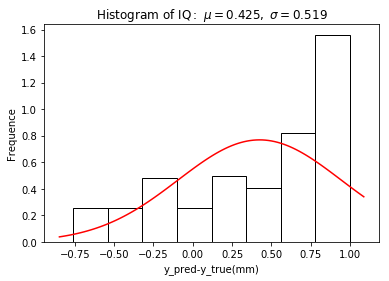

In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

data = preds-y_3mm
mean,std=norm.fit(data)

plt.hist(data, bins=8, normed=True, facecolor='white',edgecolor ="k",  alpha=1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y, c='r')
plt.xlabel('y_pred-y_true(mm)')
plt.ylabel('Frequence')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, std))
plt.show()